<a href="https://colab.research.google.com/github/habutaha/Cluster-champs_final-project_dsml2021/blob/HazemAbutaha/TechCompanyFunding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Company Funding 


* <b>Company</b>: The name of the Company
* <b>Website</b>: The web site of the company
* <b>Region</b>: The country of the company 
* <b>Vertical</b>: The Industry
* <b>Funding Amount (USD)</b>: The amount of the Funding
* <b>Funding Stage</b>: The stage of the Funding 
* <b>Funding Date</b>: The date of the Funding

### Import Data and Libraries

In [285]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# It is so Important 
import plotly.express as px

%matplotlib inline

In [286]:
techFundingDf = pd.read_csv('./tech_fundings.csv')
techFundingDf.head()

,index,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,20-Jan
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,20-Jan
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,20-Jan
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,20-Jan
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,20-Jan


In [287]:
techFundingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 3575 non-null   int64 
 1   Company               3575 non-null   object
 2   Website               3575 non-null   object
 3   Region                3563 non-null   object
 4   Vertical              3575 non-null   object
 5   Funding Amount (USD)  3575 non-null   object
 6   Funding Stage         3575 non-null   object
 7   Funding Date          3575 non-null   object
dtypes: int64(1), object(7)
memory usage: 223.6+ KB


## Feature Engineering

### Remove the missing 'Region' values

In [288]:
# Get a copy of DataFrame without missing 'Region' values
condition = techFundingDf['Region'].notnull()
techFundingDf = techFundingDf[ condition ]
techFundingDf.head()

,index,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,20-Jan
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,20-Jan
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,20-Jan
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,20-Jan
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,20-Jan


In [289]:
techFundingDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 0 to 3574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 3563 non-null   int64 
 1   Company               3563 non-null   object
 2   Website               3563 non-null   object
 3   Region                3563 non-null   object
 4   Vertical              3563 non-null   object
 5   Funding Amount (USD)  3563 non-null   object
 6   Funding Stage         3563 non-null   object
 7   Funding Date          3563 non-null   object
dtypes: int64(1), object(7)
memory usage: 250.5+ KB


### Prepare the 'Funding Amount (USD)'

In [290]:
# find the numbers of 'Unknown' in the Funding Amount
len(techFundingDf[ techFundingDf['Funding Amount (USD)'] == 'Unknown' ]['Funding Amount (USD)'])

9

In [291]:
# Removing the 'Unknown' rows from the Funding amount
techFundingDf = techFundingDf.drop([1262,1263,1264,1284,1285,1293,1301,1310,1327], axis=0)
techFundingDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 3554 non-null   int64 
 1   Company               3554 non-null   object
 2   Website               3554 non-null   object
 3   Region                3554 non-null   object
 4   Vertical              3554 non-null   object
 5   Funding Amount (USD)  3554 non-null   object
 6   Funding Stage         3554 non-null   object
 7   Funding Date          3554 non-null   object
dtypes: int64(1), object(7)
memory usage: 249.9+ KB


In [292]:
len(techFundingDf[ techFundingDf['Funding Amount (USD)'] == 'Unknown' ]['Funding Amount (USD)'])

0

In [293]:
# Change the 'Funding Amount (USD)' data type from object to float64
techFundingDf['Funding Amount (USD)'] = techFundingDf['Funding Amount (USD)'].astype(str).astype(float)
print(techFundingDf.dtypes)

index                     int64
Company                  object
Website                  object
Region                   object
Vertical                 object
Funding Amount (USD)    float64
Funding Stage            object
Funding Date             object
dtype: object


In [294]:
techFundingDf.describe()

,index,Funding Amount (USD)
count,3554.000000,3.554000e+03
mean,1785.603545,5.774267e+07
std,1031.960588,2.986841e+08
min,1.000000,4.000000e+04
25%,890.250000,5.000000e+06
50%,1787.500000,1.550830e+07
75%,2678.750000,5.000000e+07
max,3575.000000,1.660000e+10


## Exploratory data analysis (EDA) 

In [295]:
irreleventFeatures = ['index','Website','Funding Stage','Funding Date']
techFundingDf = techFundingDf.drop(irreleventFeatures,axis=1,inplace=False)
techFundingDf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3574
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               3554 non-null   object 
 1   Region                3554 non-null   object 
 2   Vertical              3554 non-null   object 
 3   Funding Amount (USD)  3554 non-null   float64
dtypes: float64(1), object(3)
memory usage: 138.8+ KB


In [296]:
# Take a sample of 700 indexs 
techFundingDf = techFundingDf[100:1100]
techFundingDf.describe()

,Funding Amount (USD)
count,1.000000e+03
mean,3.400974e+07
std,8.586539e+07
min,4.000000e+04
25%,4.000000e+06
50%,1.100000e+07
75%,3.000000e+07
max,1.901447e+09


In [297]:
# Visualize the data based on the industry 'Region'
fig = px.scatter_3d(
    techFundingDf,
    x='Region',
    y='Vertical',
    z='Funding Amount (USD)',
    color='Region',
   )

fig.update_traces(marker=dict(size=3))

fig.show()

In [298]:
# Visualize the data based on the industry 'Vertical'
fig = px.scatter_3d(
    techFundingDf,
    x='Region',
    y='Vertical',
    z='Funding Amount (USD)',
    color='Vertical',
   )

fig.update_traces(marker=dict(size=3))

fig.show()

In [299]:
fig = px.scatter_3d(
    techFundingDf,
    x='Region',
    y='Vertical',
    z='Funding Amount (USD)',
    color='Funding Amount (USD)',
   )

fig.update_traces(marker=dict(size=3))

fig.show()

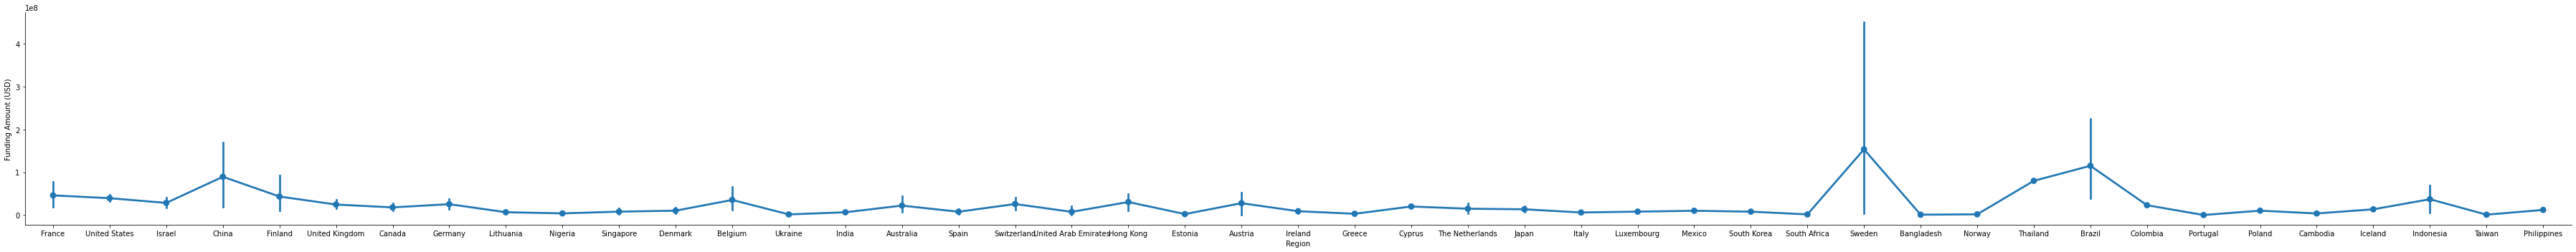

In [300]:
sns.catplot(x='Region',
            y='Funding Amount (USD)',
            data=techFundingDf,
            kind='point',
            aspect=10) 

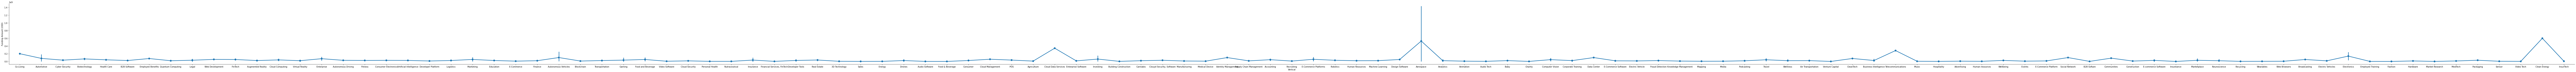

In [301]:
sns.catplot(x='Vertical', y='Funding Amount (USD)', data=techFundingDf, kind='point', aspect=35) 

### Apply the one-hot Encoding for ['Region', 'Vertical']

In [303]:
techFundingDf = pd.get_dummies( techFundingDf, columns=['Region', 'Vertical'] )

In [304]:
techFundingDf.describe()

,Funding Amount (USD),Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Brazil,Region_Cambodia,Region_Canada,Region_China,Region_Colombia,Region_Cyprus,Region_Denmark,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Greece,Region_Hong Kong,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Israel,Region_Italy,Region_Japan,Region_Lithuania,Region_Luxembourg,Region_Mexico,Region_Nigeria,Region_Norway,Region_Philippines,Region_Poland,Region_Portugal,Region_Singapore,Region_South Africa,Region_South Korea,Region_Spain,Region_Sweden,Region_Switzerland,Region_Taiwan,...,Vertical_Knowledge Management,Vertical_Legal,Vertical_Logistics,Vertical_Machine Learning,Vertical_Manufacturing,Vertical_Mapping,Vertical_Market Research,Vertical_Marketing,Vertical_Marketplace,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Podcasting,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Sensor,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.400974e+07,0.015000,0.003000,0.001000,0.010000,0.003000,0.001000,0.03400,0.008000,0.001000,0.001000,0.008000,0.005000,0.009000,0.024000,0.02900,0.001000,0.002000,0.002000,0.021000,0.002000,0.008000,0.033000,0.001000,0.002000,0.002000,0.001000,0.001000,0.004000,0.004000,0.001000,0.001000,0.001000,0.010000,0.002000,0.004000,0.008000,0.004000,0.014000,0.001000,...,0.001000,0.002000,0.019000,0.001000,0.002000,0.001000,0.001000,0.010000,0.004000,0.001000,0.001000,0.001000,0.001000,0.003000,0.001000,0.001000,0.001000,0.001000,0.001000,0.008000,0.014000,0.014000,0.001000,0.010000,0.001000,0.001000,0.001000,0.001000,0.001000,0.004000,0.005000,0.001000,0.001000,0.001000,0.005000,0.001000,0.001000,0.001000,0.001000,0.004000
std,8.586539e+07,0.121613,0.054717,0.031623,0.099549,0.054717,0.031623,0.18132,0.089129,0.031623,0.031623,0.089129,0.070569,0.094488,0.153126,0.16789,0.031623,0.044699,0.044699,0.143456,0.044699,0.089129,0.178726,0.031623,0.044699,0.044699,0.031623,0.031623,0.063151,0.063151,0.031623,0.031623,0.031623,0.099549,0.044699,0.063151,0.089129,0.063151,0.117549,0.031623,...,0.031623,0.044699,0.136593,0.031623,0.044699,0.031623,0.031623,0.099549,0.063151,0.031623,0.031623,0.031623,0.031623,0.054717,0.031623,0.031623,0.031623,0.031623,0.031623,0.089129,0.117549,0.117549,0.031623,0.099549,0.031623,0.031623,0.031623,0.031623,0.031623,0.063151,0.070569,0.031623,0.031623,0.031623,0.070569,0.031623,0.031623,0.031623,0.031623,0.063151
min,4.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0

In [305]:
techFundingDf.head()

,Company,Funding Amount (USD),Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Brazil,Region_Cambodia,Region_Canada,Region_China,Region_Colombia,Region_Cyprus,Region_Denmark,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Greece,Region_Hong Kong,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Israel,Region_Italy,Region_Japan,Region_Lithuania,Region_Luxembourg,Region_Mexico,Region_Nigeria,Region_Norway,Region_Philippines,Region_Poland,Region_Portugal,Region_Singapore,Region_South Africa,Region_South Korea,Region_Spain,Region_Sweden,Region_Switzerland,...,Vertical_Knowledge Management,Vertical_Legal,Vertical_Logistics,Vertical_Machine Learning,Vertical_Manufacturing,Vertical_Mapping,Vertical_Market Research,Vertical_Marketing,Vertical_Marketplace,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Podcasting,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Sensor,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
100,Colonies,200000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101,Via,200000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,HashiCorp,175000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103,ElevateBio,170000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104,InSightec,150000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
